<a href="https://colab.research.google.com/github/LeoDRoger/DATASET_PEMAINBOLA/blob/main/Muhammad_Akmal_Falah_091.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FOOTBALL LEAGUE***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

## Busninees Understanding

### **Tujuan Bisnis:**


* Meningkatkan peluang tim untuk memenangkan pertandingan dan liga.
* Mengidentifikasi pemain yang berkinerja baik dan membutuhkan pengembangan.
*   Mengoptimalkan strategi dan taktik tim.
*   Meningkatkan pendapatan dan basis penggemar.


### **Assess Situation**


*   Persaingan: Bagaimana performa tim dibandingkan dengan tim lain di liga?
*   Kekuatan dan Kelemahan: Apa saja aspek yang perlu ditingkatkan oleh tim?
*   Peluang: Apa saja peluang yang dapat dimanfaatkan tim untuk meningkatkan performanya?
*   Ancaman: Apa saja hambatan yang dapat menghambat performa tim?


# **Data Mining Goals**
Mengidentifikasi pola dan tren dalam data pertandingan dan pemain.
Memprediksi hasil pertandingan dan performa pemain.
Mengembangkan model untuk membantu tim dalam membuat keputusan strategis.


### **Project Plan**
Rencana Pertama Pemahaman bisnisnya seperti Menetapkan tujuan dan memahami kebutuhan stakeholders dan mengidentifkasi pertanyaan bisnis yang dapat di jawab dengan data mining.









#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data ini ditemukan di Kaggle. Dataset ini menjelaskan tentang Data statistik pertandingan sepak bola dari berbagai liga di seluruh dunia.
Data informasi pemain, seperti nama, usia, posisi, dan statistik individu.
Data informasi tim, seperti nama, logo, dan sejarah.
https://www.kaggle.com/code/dak1999/football-league-eda/log

In [ ]:
df=pd.read_csv("/content/Data (1).csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


##**Describe Data**

####Informasi Dasar

In [ ]:
jumlah_baris,jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jadi di ketehui bahwa baris dari kolom tersebut ada 660 baris dan 15 kolom

berikut penjelasan berdasarkan informasi yang diberikan diatas:
1. Country Dtype **Oject**
2. League Dtype **Oject**
3. Player Names Dtype **Oject**
4. Matches_Played  Dtype **int64**
5. Substitution   Dtype **int64**             
6. Mins    Dtype **int64**                    
7. Goals     Dtype **int64**                  
8. xG     Dtype **float64**                    
9. xG Per Avg Match  Dtype **float64**   
10. Shots  Dtype **int64**                   
11. OnTarget Dtype **int64**                   
12. Shots Per Avg Match   Dtype **float64**      
13. On Target Per Avg Match  Dtype **float64**   
14. Year  Dtype **int64**                    

####Informasi Lanjutan

In [ ]:
df.info()

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

##**Exploratory Data Analysis**

In [ ]:
df['League'] = df['League'].replace('Campeonato Brasileiro SÃ©rie A', 'Serie A')


In [ ]:
fig = plt.figure(figsize = (12, 6))
matches_league = df.groupby('League')['Matches_Played'].sum().sort_values(ascending=False)

label2 = list(matches_league.index.values)[:5]

f, ax = plt.subplots()
ax.bar(label2,matches_league[:5],color='red')
ax.set(xlabel='League',
     ylabel='Matches played')
plt.title('League/Matches Chart')
# plt.bar(label2, matches_league[:5], color ='maroon',
#         width = 0.2)

plt.xlabel("League", )
plt.ylabel("Matches played")
plt.title("Matches/League Chart")
plt.show()

Berdasarkan penjelasan Visualias diatas Serie A memperoleh match played paling banyak dan di susul la liga, Bundesliga, Premier League, MLs

##**Verify Data Quality**

####Missing Values

In [ ]:
missing_values = df.isnull().sum()

print(missing_values)

####Outliers Values

In [ ]:
def detect_outliers(column):
    # Cek apakah kolom memiliki tipe data numerik
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

        percentage_outliers = outliers.sum() / len(column) * 100

        return outliers, percentage_outliers
    else:
        return None, None

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    if outliers is not None and percentage_outliers is not None:
        print(f"Kolom '{column}':")
        print(f"  - Jumlah outliers: {outliers.sum()}")
        print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
        print()
    else:
        print(f"Kolom '{column}' tidak berisi data numerik.")

####Duplicated Values

In [ ]:
duplicate_values = df.duplicated()

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

####Inconsistent Values / Noise (Optional)

In [ ]:
for column in df.columns:
    inconsistent_values = []
    for value in df[column]:
        if not pd.api.types.is_numeric_dtype(df[column].dtype):
            if not pd.api.types.is_string_dtype(df[column].dtype):
                inconsistent_values.append(value)
        else:
            if pd.isna(value):
                inconsistent_values.append(value)
    num_inconsistent = len(inconsistent_values)

    print(f"Kolom '{column}':")
    if num_inconsistent > 0:
        print(f"  - Terdapat {num_inconsistent} nilai inkonsisten/noise: {inconsistent_values}")
    else:
        print("  - Tidak ada nilai inkonsisten/noise.")

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

#**Penanganan Duplicated Values**

In [ ]:
duplicate_rows=df[df.duplicated()]

In [ ]:
print(duplicate_rows)

#**Pengecekan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)


In [ ]:
boxplot = df.drop('Year', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df

In [20]:
df.to_csv("Data Cleaned.csv")

NameError: name 'df' is not defined

#**Libary untuk Spilitting data**

In [21]:
from sklearn.model_selection import train_test_split

#**Libary untuk normaliasasi data**

In [22]:
from sklearn.preprocessing import MinMaxScaler

#**Libary untuk Build Model**

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


inisiasi

In [24]:
df=pd.read_csv('https://raw.githubusercontent.com/LeoDRoger/DATASET_PEMAINBOLA/main/Data%20Cleaned.csv')

#**Modelling associate**

In [33]:
x_final = df.drop("Goals", axis=1)

In [30]:
df = pd.get_dummies(df)

In [31]:
df.head()

,Unnamed: 0,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,...,Player Names_Willian Jose,Player Names_Wissam Ben,Player Names_Wissam Ben Yedder,Player Names_Wout Weghorst,Player Names_Yago Pikachu,Player Names_Yeferson Soteldo,Player Names_Youssef En-Nesyri,Player Names_Yussuf Poulsen,Player Names_Zlatan Ibrahimovic,Player Names_Ãngel Di Maria
0,0,19,16,1849,11,6.62,0.34,48,20,2.47,...,0,0,0,0,0,0,0,0,0,0
1,1,36,0,3129,16,11.86,0.36,88,41,2.67,...,0,0,0,0,0,0,0,0,0,0
2,2,34,1,2940,28,23.21,0.75,120,57,3.88,...,0,0,0,0,0,0,0,0,0,0
3,3,32,3,2842,13,14.06,0.47,117,42,3.91,...,0,0,0,0,0,0,0,0,0,0
4,4,21,10,1745,13,10.65,0.58,50,23,2.72,...,0,0,0,0,0,0,0,0,0,0


In [34]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

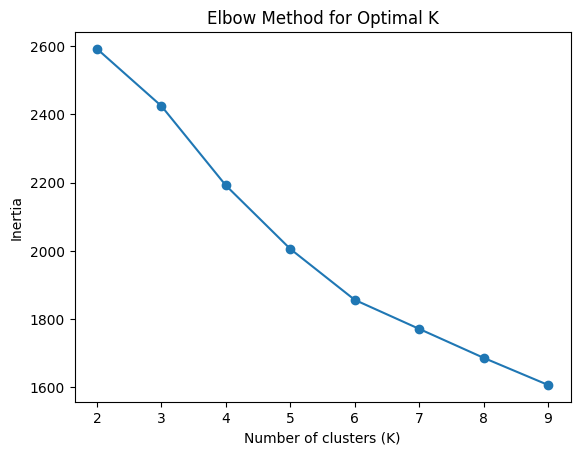

In [35]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [37]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


In [38]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [39]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [40]:
combined_data_assoc.head()

,Unnamed: 0,Matches_Played,Substitution,Mins,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,...,Player Names_Wissam Ben Yedder,Player Names_Wout Weghorst,Player Names_Yago Pikachu,Player Names_Yeferson Soteldo,Player Names_Youssef En-Nesyri,Player Names_Yussuf Poulsen,Player Names_Zlatan Ibrahimovic,Player Names_Ãngel Di Maria,kmeans_cluster,hierarchy_cluster
0,0,19,16,1849,6.62,0.34,48,20,2.47,1.03,...,0,0,0,0,0,0,0,0,2,2
1,1,36,0,3129,11.86,0.36,88,41,2.67,1.24,...,0,0,0,0,0,0,0,0,2,2
2,2,34,1,2940,23.21,0.75,120,57,3.88,1.84,...,0,0,0,0,0,0,0,0,2,2
3,3,32,3,2842,14.06,0.47,117,42,3.91,1.40,...,0,0,0,0,0,0,0,0,2,2
4,4,21,10,1745,10.65,0.58,50,23,2.72,1.25,...,0,0,0,0,0,0,0,0,2,2
